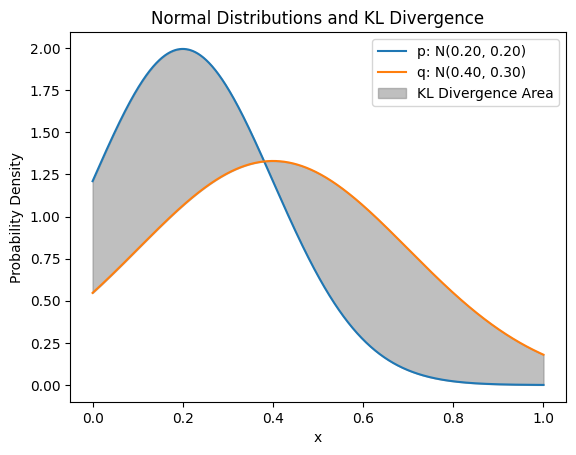

KL Divergence: 0.34990957379341125


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch

p = torch.distributions.Normal(0.2, 0.2)
q = torch.distributions.Normal(0.4, 0.3)

# Generate data points for the normal distributions
x = np.linspace(0, 1, 1000)
p_values = p.log_prob(torch.tensor(x)).exp().numpy()
q_values = q.log_prob(torch.tensor(x)).exp().numpy()

# Plot the distributions
plt.plot(x, p_values, label=f"p: N({p.loc:.2f}, {p.scale:.2f})")
plt.plot(x, q_values, label=f"q: N({q.loc:.2f}, {q.scale:.2f})")
plt.fill_between(
    x, p_values, q_values, color="gray", alpha=0.5, label="KL Divergence Area"
)
plt.title("Normal Distributions and KL Divergence")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

# Calculate and print KL divergence
kl_div = torch.distributions.kl.kl_divergence(p, q).item()
print(f"KL Divergence: {kl_div}")

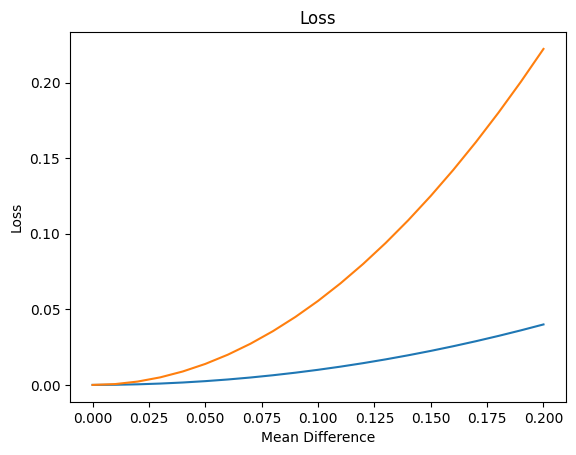

In [23]:
sigma = 0.3
mean = 0.2
kl_divergences = []
distances = np.arange(0.0, 0.21, 0.01)
for i in distances:
    p = torch.distributions.Normal(mean, sigma)
    q = torch.distributions.Normal(mean + i, sigma)
    kl_div = torch.distributions.kl.kl_divergence(p, q).item()
    kl_divergences.append(kl_div)

plt.plot(distances, np.square(distances))
plt.plot(distances, kl_divergences)
plt.title("Loss")
plt.xlabel("Mean Difference")
plt.ylabel("Loss")
plt.show()